In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "dataset/stroke.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.drop("id",axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot:>

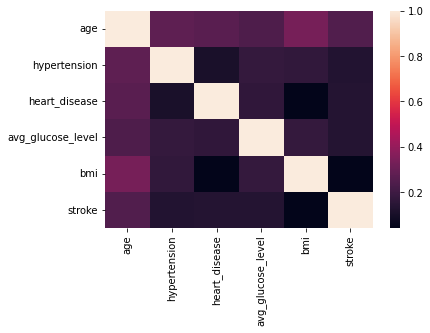

In [9]:
sns.heatmap(df.corr())

In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
df = df.dropna()

# EDA

/home/bharath/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x576 with 0 Axes>

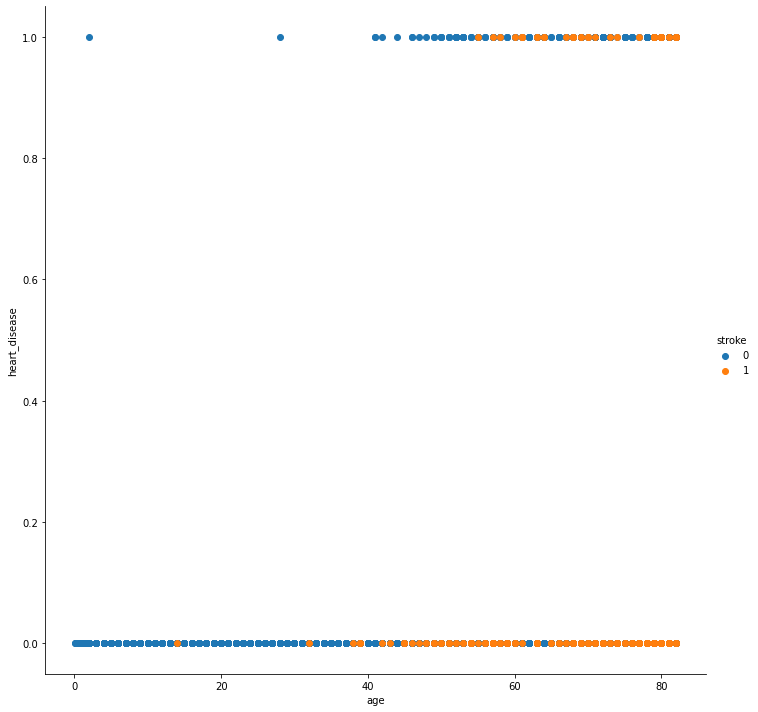

In [13]:
plt.figure(figsize=(16,8))
sns.FacetGrid(df,hue="stroke",size=10).map(plt.scatter,"age","heart_disease").add_legend()

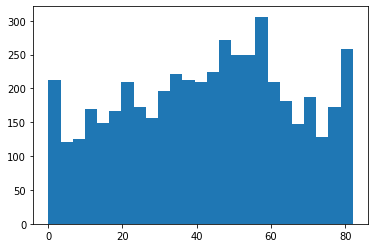

In [14]:
plt.hist(df.age,bins=25);

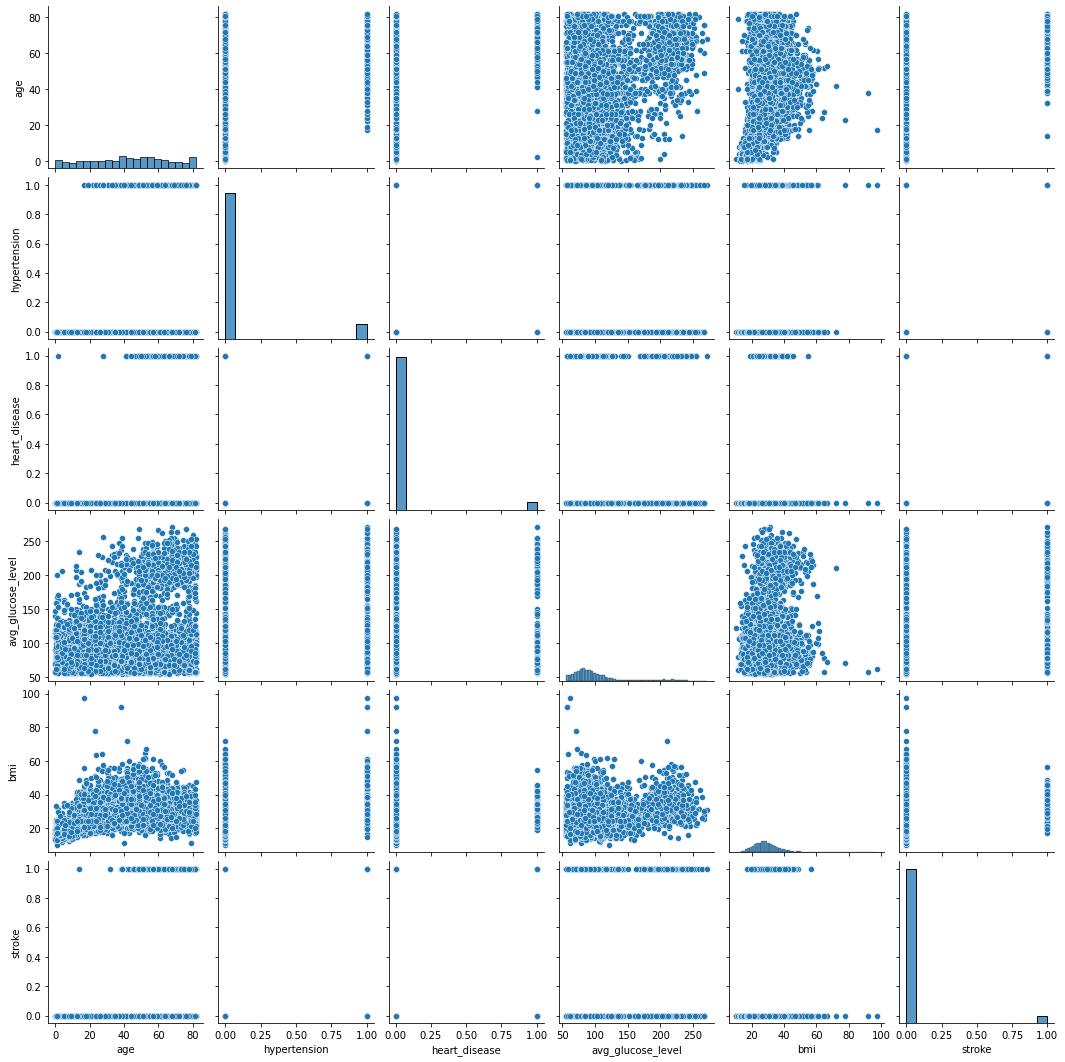

In [15]:
sns.pairplot(df)

# preprocessing 

In [16]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df.gender = le.fit_transform(df.gender)

/home/bharath/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
df.ever_married = le.fit_transform(df.ever_married)
df.work_type = le.fit_transform(df.work_type)


In [20]:
df.Residence_type = le.fit_transform(df.Residence_type)
df.smoking_status = le.fit_transform(df.smoking_status)

In [21]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
df.avg_glucose_level = scaler.fit_transform(df[["avg_glucose_level"]])

/home/bharath/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,0.801265,36.6,1,1
2,1,80.0,0,1,1,2,0,0.234512,32.5,2,1
3,0,49.0,0,0,1,2,1,0.536008,34.4,3,1
4,0,79.0,1,0,1,3,0,0.549349,24.0,2,1
5,1,81.0,0,0,1,2,1,0.605161,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,0.221402,18.6,0,0
5106,0,81.0,0,0,1,3,1,0.323516,40.0,2,0
5107,0,35.0,0,0,1,3,0,0.128658,30.6,2,0
5108,1,51.0,0,0,1,2,0,0.513203,25.6,1,0


In [25]:
df.bmi = scaler.fit_transform(df[["bmi"]])

/home/bharath/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,0.801265,0.301260,1,1
2,1,80.0,0,1,1,2,0,0.234512,0.254296,2,1
3,0,49.0,0,0,1,2,1,0.536008,0.276060,3,1
4,0,79.0,1,0,1,3,0,0.549349,0.156930,2,1
5,1,81.0,0,0,1,2,1,0.605161,0.214204,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,0.221402,0.095074,0,0
5106,0,81.0,0,0,1,3,1,0.323516,0.340206,2,0
5107,0,35.0,0,0,1,3,0,0.128658,0.232532,2,0
5108,1,51.0,0,0,1,2,0,0.513203,0.175258,1,0


In [27]:
df.age = scaler.fit_transform(df[["age"]])

/home/bharath/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1,1
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2,1
5,1,0.987793,0,0,1,2,1,0.605161,0.214204,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0.157715,0,0,0,4,0,0.221402,0.095074,0,0
5106,0,0.987793,0,0,1,3,1,0.323516,0.340206,2,0
5107,0,0.426270,0,0,1,3,0,0.128658,0.232532,2,0
5108,1,0.621582,0,0,1,2,0,0.513203,0.175258,1,0


# model selection

In [29]:
from sklearn.linear_model import LogisticRegressionCV as lrcv

In [30]:
classifier = lrcv()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop("stroke",axis = 1)
y = df['stroke']

In [33]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
y_test.value_counts()

0    1401
1      72
Name: stroke, dtype: int64

In [35]:
clf = classifier.fit(X_train,y_train)

In [36]:
y_pred = clf.predict(X_test)

In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_pred,y_test)

0.9511201629327902

In [40]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)

In [41]:
knn = neigh.fit(X_train,y_train)

In [42]:
knnpredict = knn.predict(X_test)

In [43]:
knnpredict

array([0.33333333, 0.        , 0.        , ..., 0.33333333, 0.        ,
       0.        ])

In [44]:
accuracy_score(np.round(abs(knnpredict)),y_test)

0.945010183299389